In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


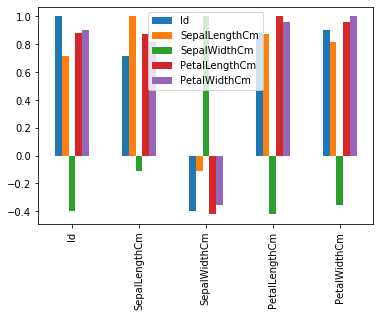

In [5]:
df.corr().plot(kind="bar")

In [6]:
dfData = df.Species
dfData.drop_duplicates()

0          Iris-setosa
50     Iris-versicolor
100     Iris-virginica
Name: Species, dtype: object

In [7]:
dic = {
    "Iris-setosa":1,
    "Iris-versicolor":2,
    "Iris-virginica":3    
};
df['Species1'] = df.Species.map(dic)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species1
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


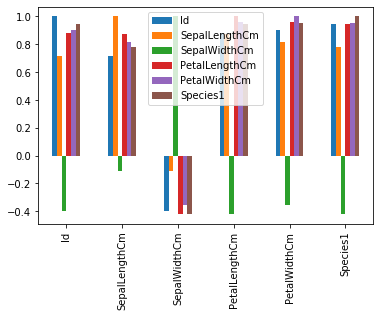

In [8]:
df.corr().plot(kind="bar")

In [9]:
df1 = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]
df1.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [10]:
df1 = df1.sample(frac=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
49,5.0,3.3,1.4,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [11]:
X = df1.loc[:,"SepalLengthCm":"PetalWidthCm"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
49,5.0,3.3,1.4,0.2
30,4.8,3.1,1.6,0.2
39,5.1,3.4,1.5,0.2
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [12]:
Y = df1[['Species']]
Y.head()

,Species
49,Iris-setosa
30,Iris-setosa
39,Iris-setosa
97,Iris-versicolor
98,Iris-versicolor


In [13]:
Y = pd.get_dummies(Y)
Y.head(2)

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
49,1,0,0
30,1,0,0


In [14]:
Y.drop_duplicates()

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
49,1,0,0
97,0,1,0
101,0,0,1


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [16]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
                optimizer=SGD(lr=0.002),
                loss="categorical_crossentropy",
                metrics=['acc']
             )

In [19]:
model.fit(X,Y,epochs=30)

Epoch 1/30
150/150 [==============================] - 0s 607us/sample - loss: 1.5784 - acc: 0.0000e+00
Epoch 2/30
150/150 [==============================] - 0s 60us/sample - loss: 1.4146 - acc: 0.0267
Epoch 3/30
150/150 [==============================] - 0s 53us/sample - loss: 1.3129 - acc: 0.2533
Epoch 4/30
150/150 [==============================] - 0s 73us/sample - loss: 1.2423 - acc: 0.3333
Epoch 5/30
150/150 [==============================] - 0s 73us/sample - loss: 1.1913 - acc: 0.3333
Epoch 6/30
150/150 [==============================] - 0s 80us/sample - loss: 1.1546 - acc: 0.2800
Epoch 7/30
150/150 [==============================] - 0s 80us/sample - loss: 1.1245 - acc: 0.2867
Epoch 8/30
150/150 [==============================] - 0s 100us/sample - loss: 1.0965 - acc: 0.2467
Epoch 9/30
150/150 [==============================] - 0s 93us/sample - loss: 1.0788 - acc: 0.3133
Epoch 10/30
150/150 [==============================] - 0s 67us/sample - loss: 1.0585 - acc: 0.3333
Epoch 11/30
1

In [20]:
dfs_1 = pd.DataFrame(np.random.randint(5,7, size=(5,1)),columns=["SepalLengthCm"])
dfs_1.head()

,SepalLengthCm
0,5
1,5
2,5
3,5
4,5


In [21]:
dfs_2 = pd.DataFrame(np.random.randint(2,4, size=(5,1)),columns=["SepalWidthCm"])
dfs_2.head()

,SepalWidthCm
0,3
1,2
2,3
3,2
4,2


In [22]:
dfs_3 = pd.DataFrame(np.random.randint(1,8, size=(5,1)),columns=["PetalLengthCm"])
dfs_3.head()

,PetalLengthCm
0,6
1,6
2,1
3,5
4,3


In [23]:
dfs_4 = pd.DataFrame(np.random.randint(0,2, size=(5,1)),columns=["PetalWidthCm"])
dfs_4.head()

,PetalWidthCm
0,1
1,0
2,1
3,0
4,0


In [24]:
dfs = pd.concat([dfs_1,dfs_2,dfs_3,dfs_4],axis=1)
dfs.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5,3,6,1
1,5,2,6,0
2,5,3,1,1
3,5,2,5,0
4,5,2,3,0


In [25]:
dfs['Predict'] = Y.columns.take(np.argmax(model.predict(dfs.loc[:,"SepalLengthCm":"PetalWidthCm"]),axis=1))
dfs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,5,3,6,1,Species_Iris-virginica
1,5,2,6,0,Species_Iris-virginica
2,5,3,1,1,Species_Iris-setosa
3,5,2,5,0,Species_Iris-virginica
4,5,2,3,0,Species_Iris-versicolor
